In [2]:
# Vogliamo rappresentare in un grafico il numero di casi totali di COVID in Italia
# giorno per giorno da inizio pandemia.

# Nell'immagine covid_total_cases.png trovate un esempio di questo grafico tratto
# dai dati pubblicati dal Sole 24 Ore, che trovate qua: https://lab24.ilsole24ore.com/coronavirus/#

# Nel file covid_confirmed_cases.csv ho salvato i dati ufficiali della John Hopkins University,
# pubblicati qua: https://github.com/CSSEGISandData/COVID-19
# In particolare, il file specifico è: 
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


# Usiamo pandas per leggere i dati da un file CSV e manipolarli
# Per installarla, esegui nel terminale: pip install pandas
import pandas as pd

# Leggiamo un CSV e lo stampiamo
cases = pd.read_csv(r"./covid_confirmed_cases.csv")
cases # Notare come Jupyter Notebook ci stampa in automatico l'ultima riga, senza print

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,210057,210070,210073,210090,210099,210112,210118,210138,210143,210150


In [3]:
# Estraiamo dal dataset la riga in cui Country/Region è Italy
cases_in_italy = cases[cases["Country/Region"] == 'Italy']
cases_in_italy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21
153,NaN,Italy,41.87194,12.56738,0,0,0,0,0,0,...,4915981,4925688,4932091,4942135,4954585,4968341,4982022,4994891,5007818,5015790


In [4]:
# Tagliamo le prime 4 colonne, ci interessa solo la serie temporale con data - valore
time_series = cases_in_italy.iloc[:,4:]
time_series.values

array([[      0,       0,       0,       0,       0,       0,       0,
              0,       0,       2,       2,       2,       2,       2,
              2,       2,       3,       3,       3,       3,       3,
              3,       3,       3,       3,       3,       3,       3,
              3,       3,      20,      62,     155,     229,     322,
            453,     655,     888,    1128,    1694,    2036,    2502,
           3089,    3858,    4636,    5883,    7375,    9172,   10149,
          12462,   15113,   17660,   21157,   24747,   27980,   31506,
          35713,   41035,   47021,   53578,   59138,   63927,   69176,
          74386,   80589,   86498,   92472,   97689,  101739,  105792,
         110574,  115242,  119827,  124632,  128948,  132547,  135586,
         139422,  143626,  147577,  152271,  156363,  159516,  162488,
         165155,  168941,  172434,  175925,  178972,  181228,  183957,
         187327,  189973,  192994,  195351,  197675,  199414,  201505,
      

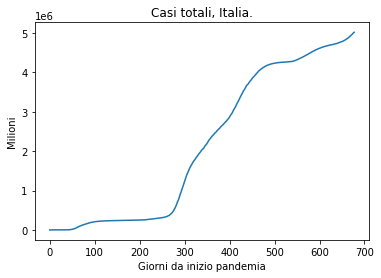

In [5]:
# Per visualizzare i dati, usiamo matplotlib
# Per installarla, esegui nel terminale: pip install matplotlib
import matplotlib.pyplot as plt

plt.title("Casi totali, Italia.")
plt.ylabel("Milioni")
plt.xlabel("Giorni da inizio pandemia")
# Values è una lista di liste, perché può rappresentare una matrice di valori
# In questo caso abbiamo una sola riga di valori.
# La matrice di valori è una lista di liste in Python.
# Visualizziamo i valori della prima riga, cioè il primo elemento della lista di liste:
plt.plot(time_series.values[0])

